### Hypothesis Testing Case Study

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats

In [2]:
cust = pd.read_csv("cust_seg.csv")

In [3]:
cust.head()

,custid,sex,AqChannel,region,Marital_status,segment,pre_usage,Post_usage_1month,Latest_mon_usage,post_usage_2ndmonth
0,70,0,4,1,1,1,57,52,49.2,57.2
1,121,1,4,2,1,3,68,59,63.6,64.9
2,86,0,4,3,1,1,44,33,64.8,36.3
3,141,0,4,3,1,3,63,44,56.4,48.4
4,172,0,4,2,1,2,47,52,68.4,57.2


In [4]:
cust.columns

Index(['custid', 'sex', 'AqChannel', 'region', 'Marital_status', 'segment',
       'pre_usage', 'Post_usage_1month', 'Latest_mon_usage',
       'post_usage_2ndmonth'],
      dtype='object')

### One Sample T-Test


In [25]:
stats.ttest_1samp(a = cust.Latest_mon_usage, popmean = 50)  # Pop mean

Ttest_1sampResult(statistic=16.57233752433133, pvalue=2.4963719280931583e-39)

In [26]:
cust.Latest_mon_usage.mean()

63.17400000000001

### Two Sample T-Test (Paired)

In [28]:
print (cust.pre_usage.mean())
print (cust.Post_usage_1month.mean())
print (cust.post_usage_2ndmonth.mean())
print (cust.Latest_mon_usage.mean())

52.23
52.775
58.05250000000003
63.17400000000001


In [31]:
# stats.ttest_rel(a = before, b = after)
stats.ttest_rel(a = cust.post_usage_2ndmonth, b = cust.Latest_mon_usage)

Ttest_relResult(statistic=-7.620000682682452, pvalue=1.0107048084716273e-12)

### Two sample T-Test (Independent)

In [33]:
Males_spend = cust.Post_usage_1month[cust.sex == 0]
FeMales_spend = cust.Post_usage_1month[cust.sex == 1]

In [34]:
print (Males_spend.mean())
print (FeMales_spend.mean())

50.120879120879124
54.99082568807339


In [35]:
print (Males_spend.var())
print (FeMales_spend.var())

106.19633699633701
66.15732246007477


In [40]:
stats.ttest_rel?

In [36]:
stats.ttest_ind(a = Males_spend, b = FeMales_spend)

Ttest_indResult(statistic=-3.7340738531536797, pvalue=0.00024625461203549315)

In [37]:
stats.f_oneway(Males_spend, FeMales_spend)

F_onewayResult(statistic=13.94330754080599, pvalue=0.0002462546120354903)

### ANOVA

In [12]:
cust.head()

,custid,sex,AqChannel,region,Marital_status,segment,pre_usage,Post_usage_1month,Latest_mon_usage,post_usage_2ndmonth
0,70,0,4,1,1,1,57,52,49.2,57.2
1,121,1,4,2,1,3,68,59,63.6,64.9
2,86,0,4,3,1,1,44,33,64.8,36.3
3,141,0,4,3,1,3,63,44,56.4,48.4
4,172,0,4,2,1,2,47,52,68.4,57.2


In [15]:
cust.segment.count()

200

In [13]:
cust.segment.value_counts()

2    105
3     50
1     45
Name: segment, dtype: int64

In [19]:
s1 = cust.Latest_mon_usage[cust.segment == 1]
s2 = cust.Latest_mon_usage[cust.segment == 2]
s3 = cust.Latest_mon_usage[cust.segment == 3]

In [20]:
# Perform the ANOVA
stats.f_oneway(s1, s2, s3)

F_onewayResult(statistic=29.279283801321778, pvalue=7.36401083352674e-12)

In [ ]:
cust.Latest_mon_usage.mean()
cust.Latest_mon_usage.std()

In [ ]:
print (s1.mean()); print (s2.mean()); print (s3.mean())

### Chi-squre Test

In [5]:
summ = cust.groupby(['region', 'segment']).custid.count().reset_index()
t = summ.pivot('segment', 'region', 'custid')
t

region,1,2,3
segment,,,
1,16,20,9
2,19,44,42
3,12,31,7


In [6]:
t = cust.pivot_table(index = 'segment', columns = 'region', values = 'custid', aggfunc = 'count')
t

region,1,2,3
segment,,,
1,16,20,9
2,19,44,42
3,12,31,7


In [7]:
t = pd.crosstab(index = cust.segment, columns = cust.region)

In [8]:
t=pd.crosstab(cust.segment, cust.region, margins = True)
t

region,1,2,3,All
segment,,,,
1,16,20,9,45
2,19,44,42,105
3,12,31,7,50
All,47,95,58,200


In [9]:
# Ho = Both Segment and region are independant variables

# Ha = Both Segment and region are dependant variables

# CI = 99%

p = 0.01

if stats.chi2_contingency(t)[1] < p:
    print('Both Segment and region are dependant variables')
else:
    print('Both Segment and region are independant variables')

Both Segment and region are independant variables


In [10]:
stats.chi2_contingency(t)

(16.60444164948934,
 0.055282939487992365,
 9,
 array([[ 10.575,  21.375,  13.05 ,  45.   ],
        [ 24.675,  49.875,  30.45 , 105.   ],
        [ 11.75 ,  23.75 ,  14.5  ,  50.   ],
        [ 47.   ,  95.   ,  58.   , 200.   ]]))

### Correlation

In [50]:
np.corrcoef(cust.Latest_mon_usage, cust.pre_usage)

array([[1.        , 0.66228013],
       [0.66228013, 1.        ]])

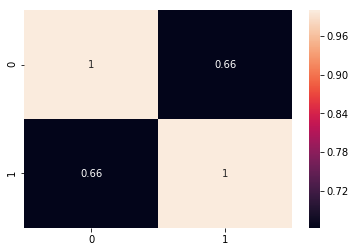

In [48]:
sns.heatmap((np.corrcoef(cust.Latest_mon_usage, cust.pre_usage)), annot=True)

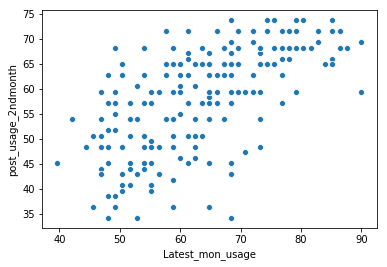

In [45]:
sns.scatterplot(cust.Latest_mon_usage, cust.post_usage_2ndmonth)

In [46]:
stats.pearsonr(cust.Latest_mon_usage, cust.post_usage_2ndmonth)

(0.617449264485492, 2.0866647416870638e-22)